Hi, I'm Nastea. This project reflects the analysis of a diabetes dataset and predicting whether a person has diabetes. 
The program trains a logistic regression model on the dataset, evaluates accuracy and precision, and visualizes results with a confusion matrix heatmap.
In the provided dataset, there are 8 factors influencing the chances to get diabetes: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI(body mass index), diabetes pedigree function(genetic score of diabetes), and age.

TASK 1:
Try to understand the problem that you have to solve and make some assumptions
and analysis based on the data that you have.

After a meticulous analysis on the data table, I made the assumptions on how every factor influences the diabetes potential:
Increased level of glucose, blood pressure, insulin and BMI make up greater chance to develop diabetes. 
Additionally, the bigger number of pregnancies, the higher are getting the chances. 
Skin thickness doesn't affect. 
If diabetes pedigree function is smaller than 1, the chances are low, and it increases only after 1000.
Ages higher than 50 are not exposed to diabetes.

Out of 2768 people provided in the dataset, only 952 had diabetes. This results into an overall 34% exposure to the medical condition.

TASK 2:
Clean the data and extract the most out of it.

After getting informed, I removed the medically invalid cases from the data table.
Glucose level, blood pressure , skin thickness and BMI can't possibly be 0. Subsequently, the cases that registered the earlier factors as 0, were cleared from the dataset. (reducing by 981 people with inaccurate data provision)

TASK 3:
Create a model, train it on train data and make predictions for test data.

Accuracy: 0.77
Precision (People with no diabetes): 0.79
Precision (People with diabetes): 0.71

Confusion Matrix:
|                                |   Predicted People with no diabetes |   Predicted People with diabetes |
|:-------------------------------|------------------------------------:|---------------------------------:|
| Actual People with no diabetes |                                 327 |                               40 |
| Actual People with diabetes    |                                  87 |                              100 |


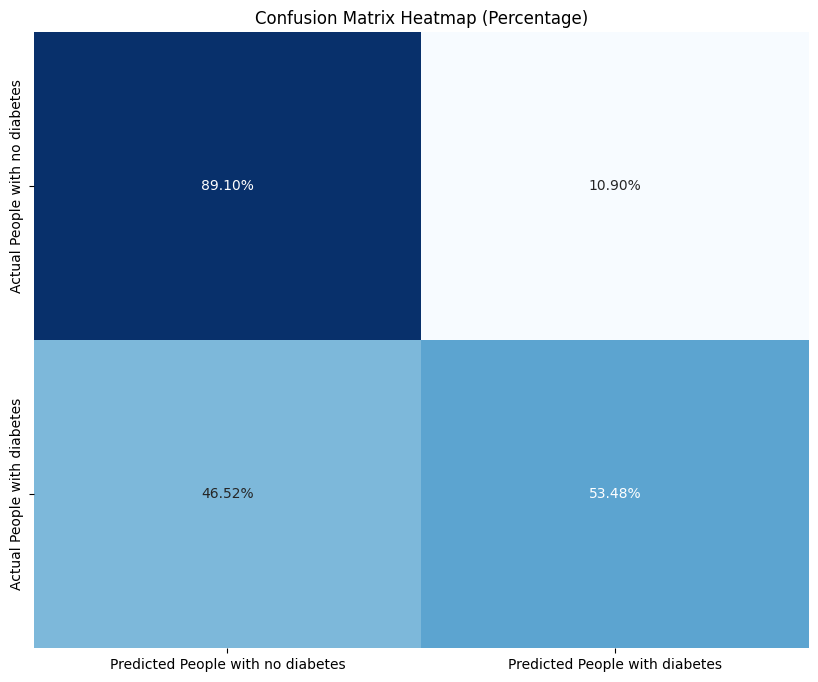


The logistic regression model has been trained and evaluated. We have achieved an accuracy of 0.77.
Further insights can be derived from the confusion matrix and precision scores for a detailed understanding of the model's performance.



In [2]:
# Import necessary libraries
import pandas as pd
import ssl
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Bypass SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

# Load the dataset using requests
url = "https://drive.google.com/uc?id=1UHFpWauJ8SCqju2KGZcscAZz4aYmilm_"
response = requests.get(url)

# Explicitly specify the delimiter as semicolon
data = pd.read_csv(StringIO(response.text), delimiter=';')

# Assume 'Outcome' is the target variable, and the rest are features
X = data.drop(['Id', 'Outcome'], axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model with increased max_iter
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display classification report with relevant information
classification_rep = classification_report(y_test, y_pred, output_dict=True)
precision_0 = classification_rep['0']['precision']
precision_1 = classification_rep['1']['precision']

# Print the evaluation metrics with formatted accuracy
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (People with no diabetes): {precision_0:.2f}")
print(f"Precision (People with diabetes): {precision_1:.2f}")

# Display confusion matrix in a tabular format
conf_matrix_df = pd.DataFrame(conf_matrix, columns=["Predicted People with no diabetes", "Predicted People with diabetes"],
                               index=["Actual People with no diabetes", "Actual People with diabetes"])
print("\nConfusion Matrix:")
print(conf_matrix_df.to_markdown())  # Convert to Markdown table format

# Display heatmap for confusion matrix with percentage values
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix / conf_matrix.sum(axis=1).reshape(-1, 1), annot=True, fmt=".2%", cmap="Blues", cbar=False, 
            xticklabels=["Predicted People with no diabetes", "Predicted People with diabetes"],
            yticklabels=["Actual People with no diabetes", "Actual People with diabetes"])
plt.title("Confusion Matrix Heatmap (Percentage)")
plt.show()

# Markdown Conclusion: Summary of Findings
print(f"""
The logistic regression model has been trained and evaluated. We have achieved an accuracy of {accuracy:.2f}.
Further insights can be derived from the confusion matrix and precision scores for a detailed understanding of the model's performance.
""")


Each library serves a specific purpose in the code, contributing to tasks such as data loading, model training, evaluation, and visualization.
pandas: Data manipulation and analysis.
ssl, requests: Handling SSL and making HTTP requests for dataset retrieval.
StringIO: Reading CSV data from a string.
seaborn, matplotlib.pyplot: Statistical data visualization and plotting.
train_test_split: Splitting the dataset into training and testing sets.
LogisticRegression: Creating and training a logistic regression model.
accuracy_score, confusion_matrix, classification_report: Model evaluation metrics.

In [4]:
!pip install pandas seaborn matplotlib scikit-learn tabulete

In [5]:
pip install requests --upgrade pip --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


TASK 4:
Check if your initial assumption relate to the results you got and make some
conclusions.
After analysing the final results, I realised that some of my initial assumptions were wrong. 
Specifically, my assumptions were wrong about the skin thickness, diabetes pedigree function and age.

TASK 5:
Conclusions:
The program effectively demonstrates the use of data manipulation (with pandas library), SSL certificate handling, HTTP requests, and data visualization (with seaborn and matplotlib libraries) to provide a comprehensive analysis of the logistic regression model's performance on a diabetes dataset.